In [135]:
import pandas as pd
import matplotlib.pyplot as plt

import torch

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# 1. CSV 파일에 접근

In [136]:
# CSV 파일에 접근
maml_norm_info = pd.read_csv('../MAML_filter64/MAML_filter64_inner_loop.csv')
arbiter_norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot_filter64/MAML+Arbiter_5way_5shot_filter64_inner_loop.csv')

# 훈련 정보만 가지고 온다
maml_norm_info_train = maml_norm_info[maml_norm_info['phase']=='train']
arbiter_norm_info_train= arbiter_norm_info[arbiter_norm_info['phase']=='train']

C:\Users\JM\anaconda3\envs\maml\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [137]:
arbiter_norm_info_train

,current_iter,phase,num_step,layer_dict.conv0.conv.weight_alpha,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_grad_var,layer_dict.conv0.conv.weight_gsnr,layer_dict.conv0.conv.weight_weight_mean,...,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_weight_var,all_grads_var,all_grads_l2norm,all_grads_mean,all_weights_norm,all_weights_var,all_weights_mean,gsnr
0,0,train,0,0.694372,-0.002307,20.434258,0.694372,0.000274,0.019442,-0.002287,...,0.015868,0.007617,0.000015,0.000046,2.344834,-0.000038,14.412805,0.001723,-0.000005,0.000032
1,0,train,1,0.691446,-0.002006,20.991417,0.691446,0.000273,0.014744,-0.002267,...,0.032499,0.015419,0.000059,0.000046,2.345386,-0.000022,14.412802,0.001723,-0.000005,0.000011
2,0,train,2,0.690253,-0.002156,21.076786,0.690253,0.000271,0.017132,-0.002245,...,0.049771,0.023248,0.000135,0.000045,2.340327,-0.000056,14.412815,0.001723,-0.000004,0.000070
3,0,train,3,0.683708,-0.000564,21.068472,0.683708,0.000270,0.001177,-0.002240,...,0.066361,0.030590,0.000234,0.000045,2.336979,-0.000032,14.412856,0.001723,-0.000004,0.000023
4,0,train,4,0.669606,-0.000935,20.626034,0.669606,0.000259,0.003377,-0.002230,...,0.079620,0.036846,0.000339,0.000045,2.335047,-0.000038,14.412911,0.001723,-0.000003,0.000031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796995,49999,train,0,0.238572,0.000036,5.669911,0.238572,0.000033,0.000040,-0.006088,...,0.083931,0.048724,0.000311,5.066380,781.605225,-0.004824,77.313026,0.048595,-0.031239,0.000005
796996,49999,train,1,0.511802,-0.003091,11.474688,0.511802,0.000142,0.067219,-0.006057,...,0.083931,0.048724,0.000311,4.408905,729.132202,-0.008237,77.662704,0.049050,-0.031157,0.000015
796997,49999,train,2,0.640624,-0.003093,14.959427,0.640624,0.000228,0.041938,-0.006026,...,0.083931,0.048724,0.000311,4.191300,710.917969,-0.012027,78.236595,0.049799,-0.031036,0.000035
796998,49999,train,3,0.831240,-0.001925,20.954256,0.831240,0.000396,0.009348,-0.006007,...,0.083931,0.048724,0.000311,3.914203,687.028809,-0.016767,79.338638,0.051250,-0.030869,0.000072


# 2. MAML과 Arbiter의 Step 별 정보

In [165]:
# maml_per_inner_loop_step = maml_norm_info_train.groupby('num_step').mean()
# arbiter_per_inner_loop_step = arbiter_norm_info_train.groupby('num_step').mean()
maml_per_inner_loop_step = maml_norm_info_train.groupby('num_step').mean()
arbiter_per_inner_loop_step = arbiter_norm_info_train.groupby('num_step').mean()

In [166]:
maml_per_inner_loop_step

,current_iter,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_grad_var,layer_dict.conv0.conv.weight_gsnr,layer_dict.conv0.conv.weight_weight_mean,layer_dict.conv0.conv.weight_weight_L1norm,layer_dict.conv0.conv.weight_weight_L2norm,layer_dict.conv0.conv.weight_weight_var,...,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_weight_var,all_grads_var,all_grads_l2norm,all_grads_mean,all_weights_norm,all_weights_var,all_weights_mean,gsnr
num_step,,,,,,,,,,,,,,,,,,,,,
0,25000.0,0.005683,278.492766,11.002409,0.076222,0.040885,-0.003854,227.904182,6.918739,0.030140,...,0.832483,0.400142,0.050551,0.011990,37.438106,0.000360,51.044886,0.023988,-0.016666,0.000067
1,25000.0,-0.002311,97.746566,3.765504,0.008879,0.039609,-0.003831,227.910141,6.918852,0.030141,...,0.821373,0.394391,0.049390,0.009762,33.559329,0.000045,51.044877,0.023988,-0.016666,0.000014
2,25000.0,-0.005695,89.372492,3.502199,0.007894,0.045371,-0.003774,227.911111,6.918971,0.030143,...,0.816596,0.392901,0.048837,0.006139,26.394722,-0.000114,51.045242,0.023988,-0.016665,0.000022
3,25000.0,0.000344,39.477134,1.485407,0.001370,0.035255,-0.003777,227.912642,6.918991,0.030143,...,0.819159,0.393950,0.049113,0.000882,9.663924,0.000002,51.045323,0.023988,-0.016665,0.000023
4,25000.0,0.000134,16.633284,0.627881,0.000282,0.033114,-0.003778,227.912974,6.918996,0.030143,...,0.819200,0.393919,0.049121,0.000108,3.088900,-0.000006,51.045403,0.023988,-0.016665,0.000037


In [167]:
arbiter_per_inner_loop_step

,layer_dict.conv0.conv.weight_alpha,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_grad_var,layer_dict.conv0.conv.weight_gsnr,layer_dict.conv0.conv.weight_weight_mean,layer_dict.conv0.conv.weight_weight_L1norm,layer_dict.conv0.conv.weight_weight_L2norm,layer_dict.conv0.conv.weight_weight_var,...,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_weight_var,all_grads_var,all_grads_l2norm,all_grads_mean,all_weights_norm,all_weights_var,all_weights_mean,gsnr
num_step,,,,,,,,,,,,,,,,,,,,,
0,0.606603,-0.000019,14.525214,0.606603,0.000272,0.036603,-0.004474,226.030576,6.648546,0.027722,...,0.105540,0.055175,0.000706,0.926125,273.139736,0.000304,52.024582,0.024547,-0.022636,0.000036
1,0.675419,0.000764,15.432639,0.675419,0.000337,0.031913,-0.004482,226.030360,6.648550,0.027722,...,0.105605,0.055211,0.000706,0.867030,266.539279,-0.012183,52.123630,0.024661,-0.022514,0.000670
2,0.697223,0.000688,16.937548,0.697223,0.000363,0.027083,-0.004489,226.030554,6.648554,0.027722,...,0.105687,0.055255,0.000707,0.846313,264.255990,-0.012504,52.240504,0.024795,-0.022389,0.000820
3,0.709928,0.000712,17.694314,0.709928,0.000380,0.027310,-0.004496,226.031121,6.648559,0.027722,...,0.105778,0.055305,0.000708,0.831869,262.750900,-0.011355,52.372389,0.024943,-0.022276,0.000772
4,0.720817,0.000451,17.877003,0.720817,0.000396,0.029115,-0.004500,226.031714,6.648564,0.027722,...,0.105876,0.055356,0.000709,0.820472,261.600106,-0.010761,52.521125,0.025109,-0.022168,0.000777


# 3. MAML과 Arbiter의 Iteration 별 정보

In [139]:
maml_norm_info_train=maml_norm_info_train[maml_norm_info_train['current_iter'] < 50001]


maml_gr = maml_norm_info_train.groupby('current_iter').mean()
arbiter_gr = arbiter_norm_info_train.groupby('current_iter').mean()

# 4. Column 정보

In [140]:
arbiter_gr.columns

Index(['num_step', 'layer_dict.conv0.conv.weight_alpha',
       'layer_dict.conv0.conv.weight_grad_mean',
       'layer_dict.conv0.conv.weight_grad_L1norm',
       'layer_dict.conv0.conv.weight_grad_L2norm',
       'layer_dict.conv0.conv.weight_grad_var',
       'layer_dict.conv0.conv.weight_gsnr',
       'layer_dict.conv0.conv.weight_weight_mean',
       'layer_dict.conv0.conv.weight_weight_L1norm',
       'layer_dict.conv0.conv.weight_weight_L2norm',
       ...
       'layer_dict.linear.bias_weight_L1norm',
       'layer_dict.linear.bias_weight_L2norm',
       'layer_dict.linear.bias_weight_var', 'all_grads_var',
       'all_grads_l2norm', 'all_grads_mean', 'all_weights_norm',
       'all_weights_var', 'all_weights_mean', 'gsnr'],
      dtype='object', length=108)

# 5. Gradient Variance

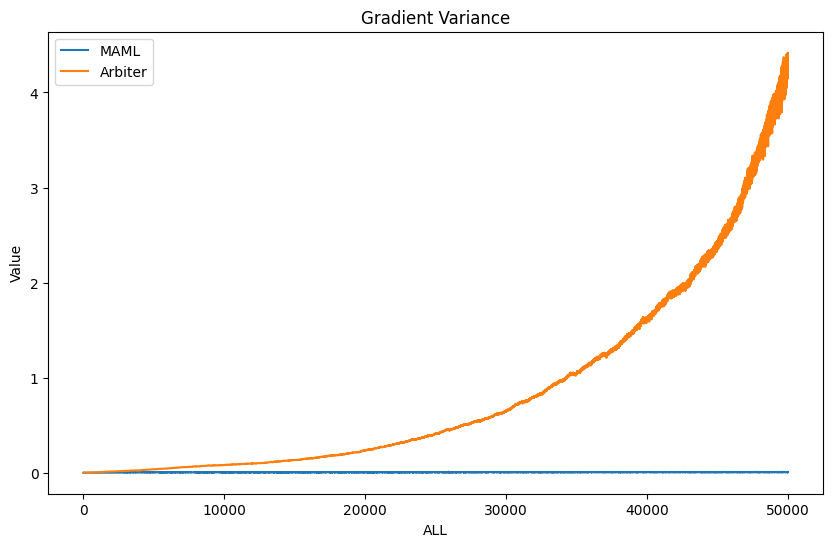

In [141]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['all_grads_var'], label='MAML')
plt.plot(arbiter_gr['all_grads_var'],label='Arbiter')

plt.xlabel('ALL')
plt.ylabel('Value')
plt.title('Gradient Variance')
plt.legend()

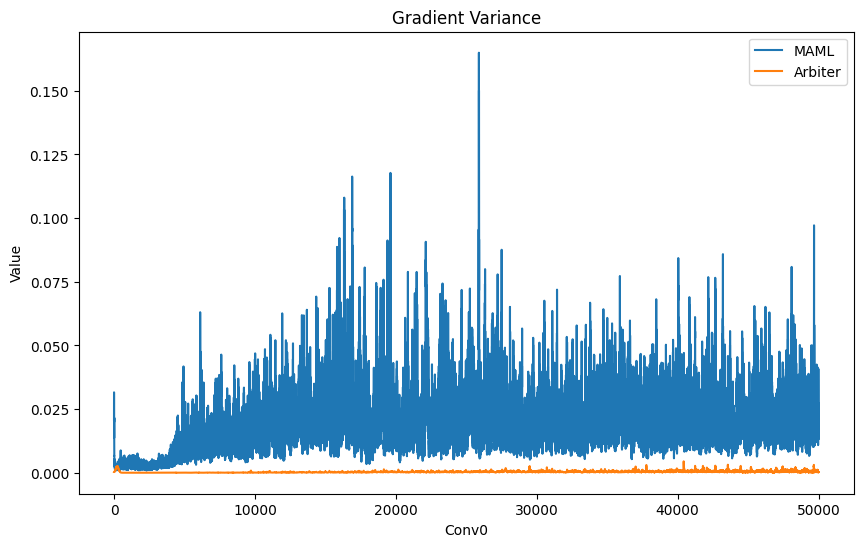

In [142]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv0.conv.weight_grad_var'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv0.conv.weight_grad_var'],label='Arbiter')

plt.xlabel('Conv0')
plt.ylabel('Value')
plt.title('Gradient Variance')
plt.legend()

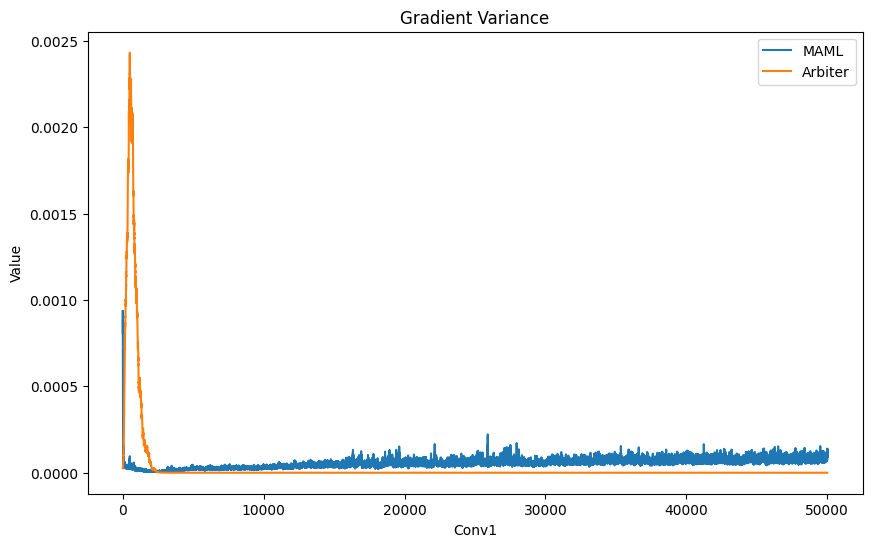

In [143]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv1.conv.weight_grad_var'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv1.conv.weight_grad_var'],label='Arbiter')

plt.xlabel('Conv1')
plt.ylabel('Value')
plt.title('Gradient Variance')
plt.legend()

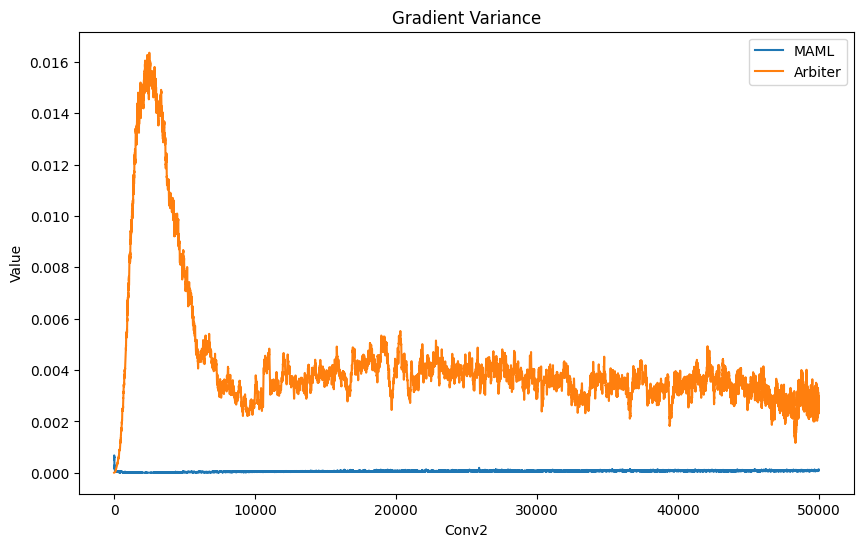

In [144]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv2.conv.weight_grad_var'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv2.conv.weight_grad_var'],label='Arbiter')

plt.xlabel('Conv2')
plt.ylabel('Value')
plt.title('Gradient Variance')
plt.legend()

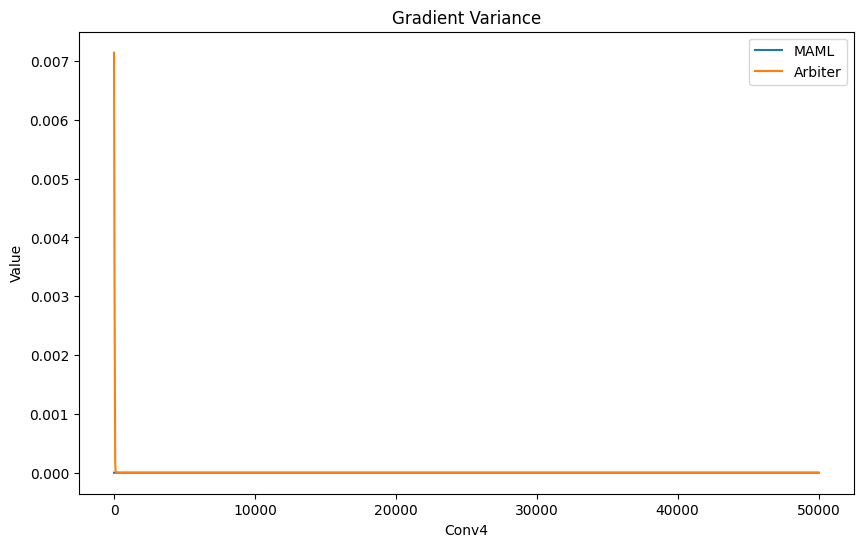

In [174]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv3.conv.bias_grad_var'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv3.conv.bias_grad_var'],label='Arbiter')

plt.xlabel('Conv4')
plt.ylabel('Value')
plt.title('Gradient Variance')
plt.legend()

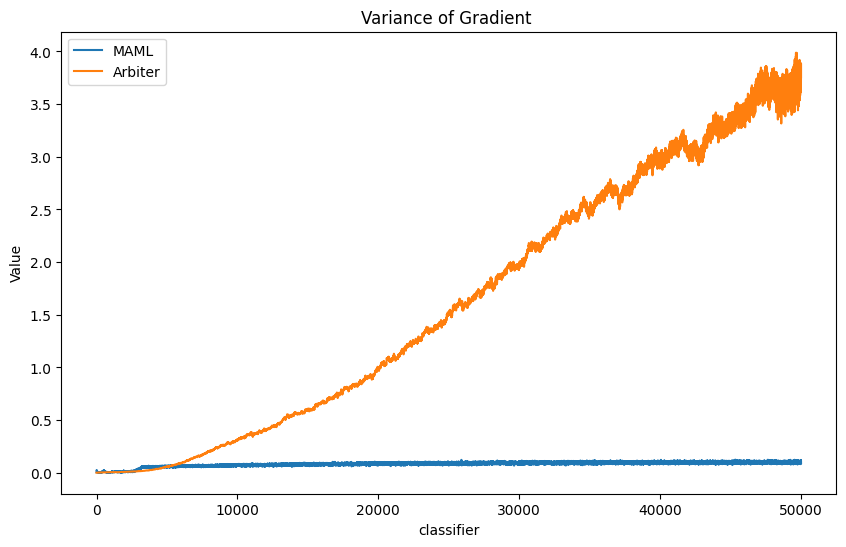

In [146]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.linear.weights_grad_var'], label='MAML')
plt.plot(arbiter_gr['layer_dict.linear.weights_grad_var'],label='Arbiter')

plt.xlabel('classifier')
plt.ylabel('Value')
plt.title('Variance of Gradient ')
plt.legend()

# 6. Weight L2 Norm

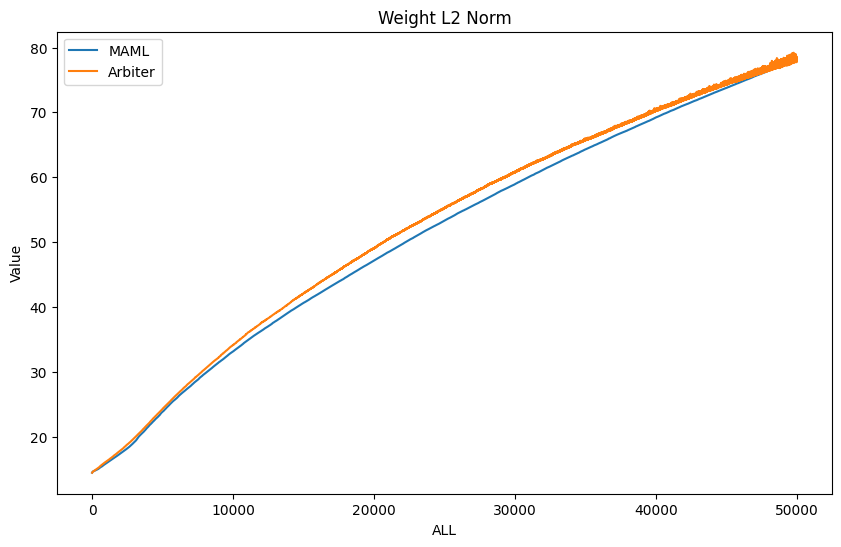

In [147]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['all_weights_norm'], label='MAML')
plt.plot(arbiter_gr['all_weights_norm'],label='Arbiter')

plt.xlabel('ALL')
plt.ylabel('Value')
plt.title('Weight L2 Norm')
plt.legend()

# 7. Weight Variance

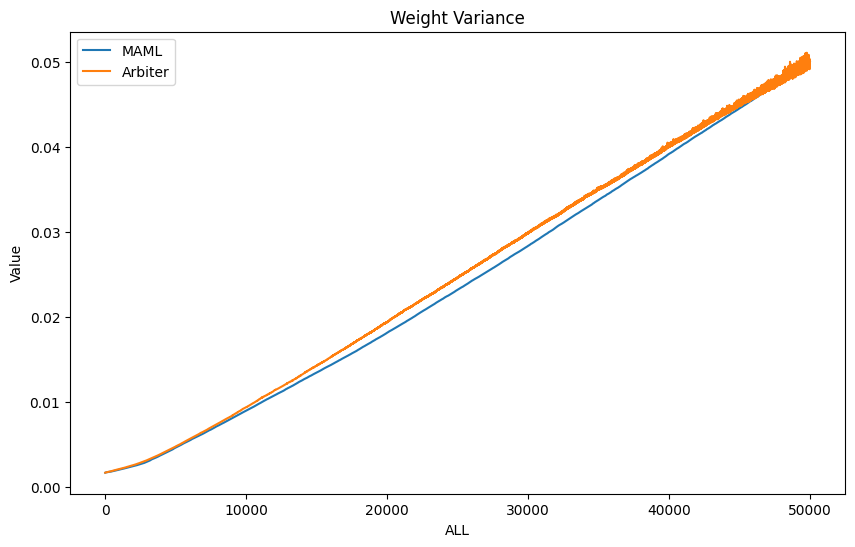

In [148]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['all_weights_var'], label='MAML')
plt.plot(arbiter_gr['all_weights_var'],label='Arbiter')

plt.xlabel('ALL')
plt.ylabel('Value')
plt.title('Weight Variance')
plt.legend()

# 8. Gradient Mean

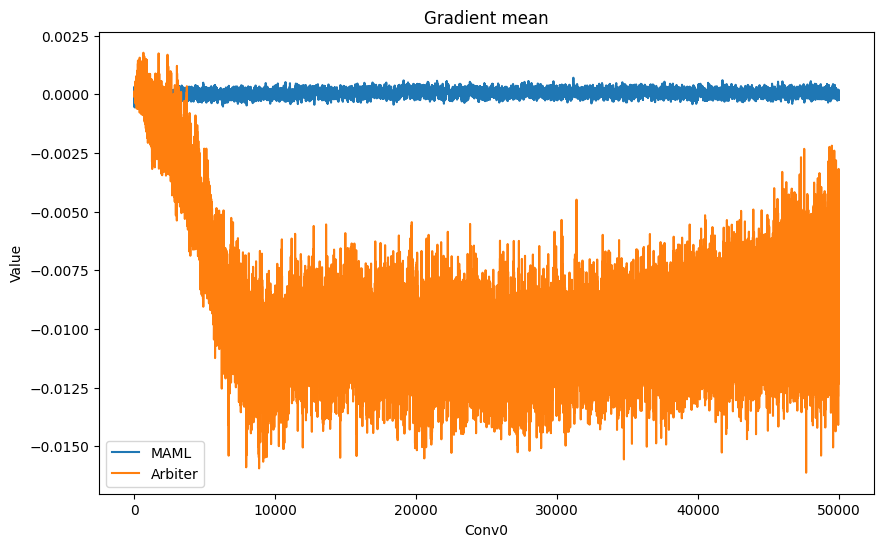

In [149]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['all_grads_mean'], label='MAML')
plt.plot(arbiter_gr['all_grads_mean'],label='Arbiter')

plt.xlabel('Conv0')
plt.ylabel('Value')
plt.title('Gradient mean')
plt.legend()

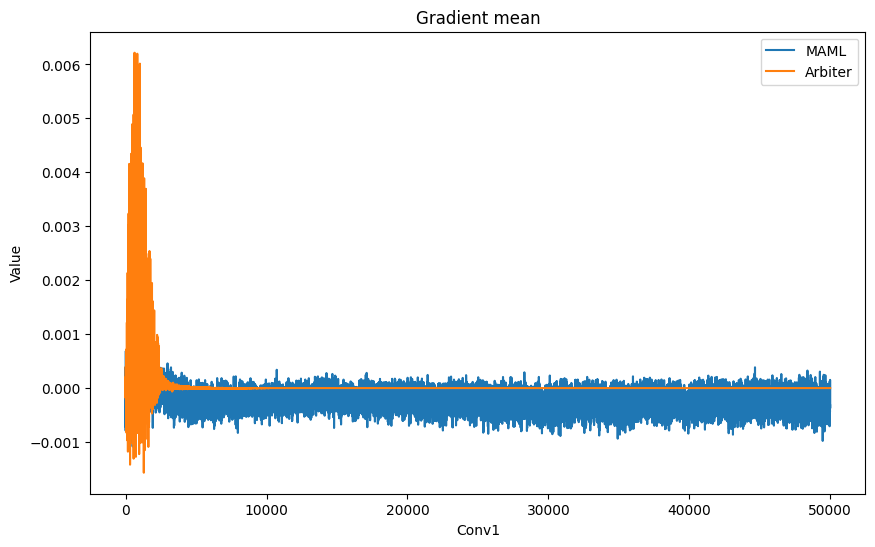

In [150]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv1.conv.weight_grad_mean'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv1.conv.weight_grad_mean'],label='Arbiter')

plt.xlabel('Conv1')
plt.ylabel('Value')
plt.title('Gradient mean')
plt.legend()

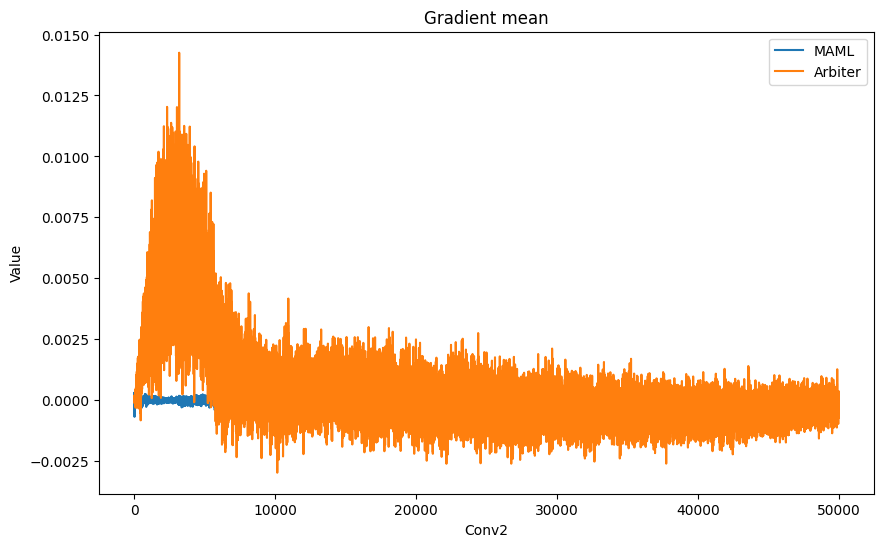

In [151]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv2.conv.weight_grad_mean'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv2.conv.weight_grad_mean'],label='Arbiter')

plt.xlabel('Conv2')
plt.ylabel('Value')
plt.title('Gradient mean')
plt.legend()

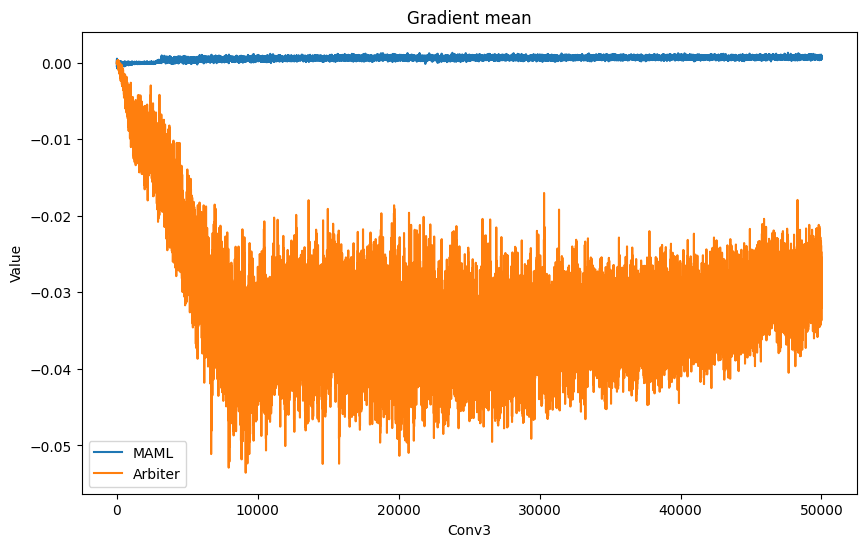

In [152]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv3.conv.weight_grad_mean'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv3.conv.weight_grad_mean'],label='Arbiter')

plt.xlabel('Conv3')
plt.ylabel('Value')
plt.title('Gradient mean')
plt.legend()

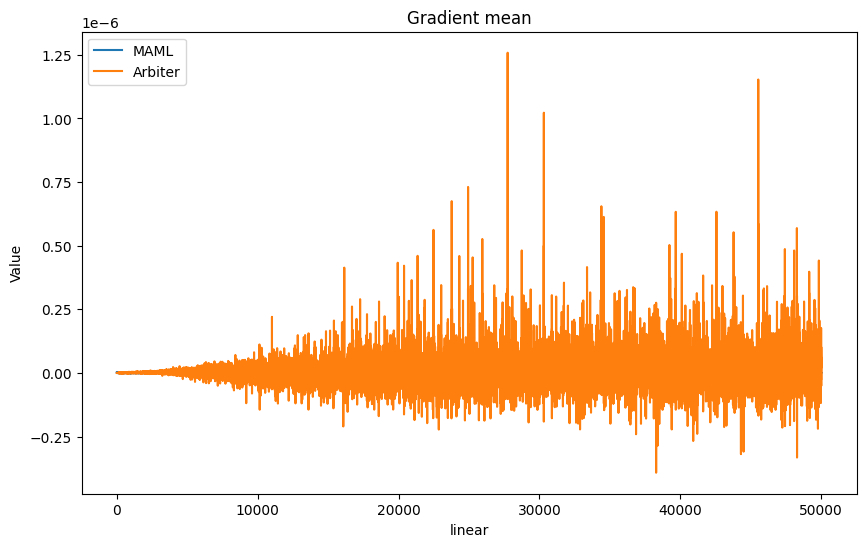

In [153]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.linear.weights_grad_mean'], label='MAML')
plt.plot(arbiter_gr['layer_dict.linear.weights_grad_mean'],label='Arbiter')

plt.xlabel('linear')
plt.ylabel('Value')
plt.title('Gradient mean')
plt.legend()

# 9. GSNR

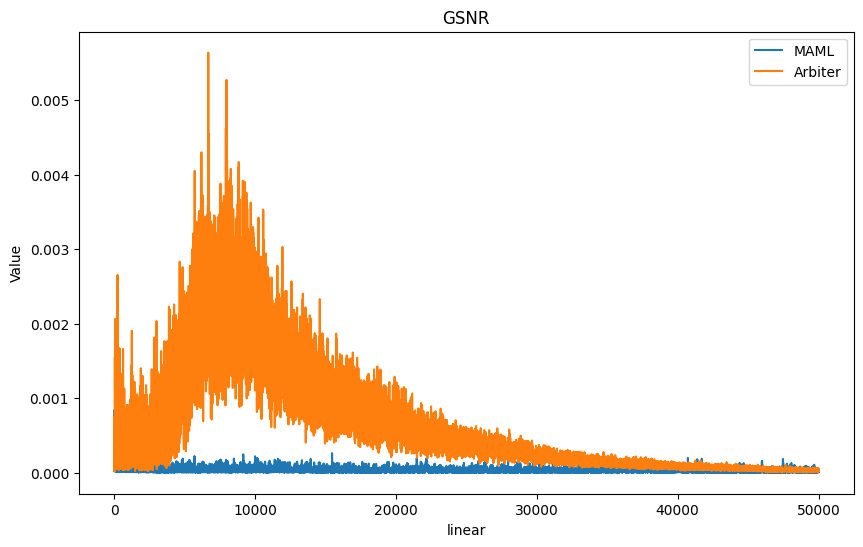

In [154]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['gsnr'], label='MAML')
plt.plot(arbiter_gr['gsnr'],label='Arbiter')

plt.xlabel('linear')
plt.ylabel('Value')
plt.title('GSNR')
plt.legend()

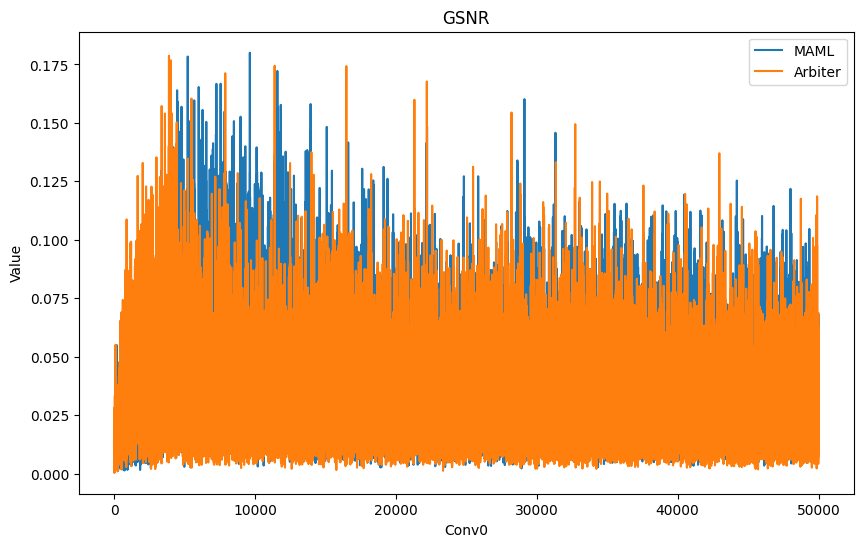

In [162]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv0.conv.weight_gsnr'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv0.conv.weight_gsnr'],label='Arbiter')

plt.xlabel('Conv0')
plt.ylabel('Value')
plt.title('GSNR')
plt.legend()

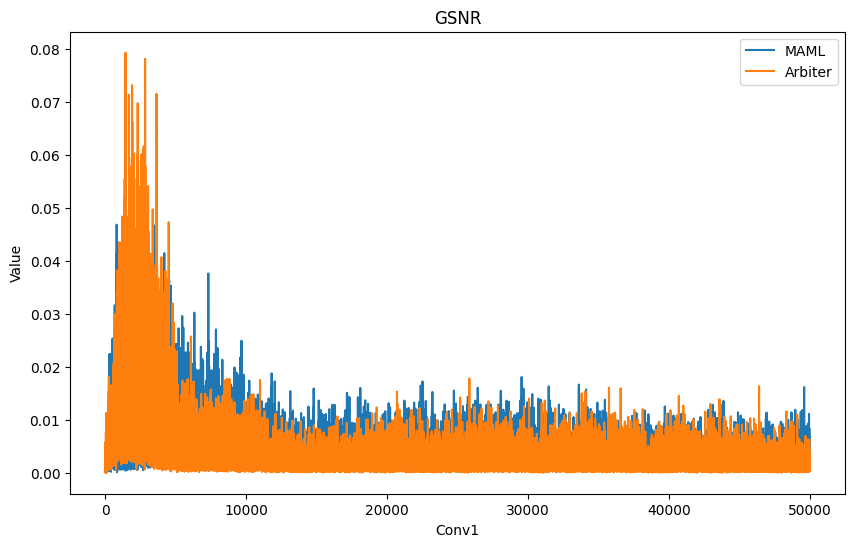

In [164]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv1.conv.weight_gsnr'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv1.conv.weight_gsnr'],label='Arbiter')

plt.xlabel('Conv1')
plt.ylabel('Value')
plt.title('GSNR')
plt.legend()

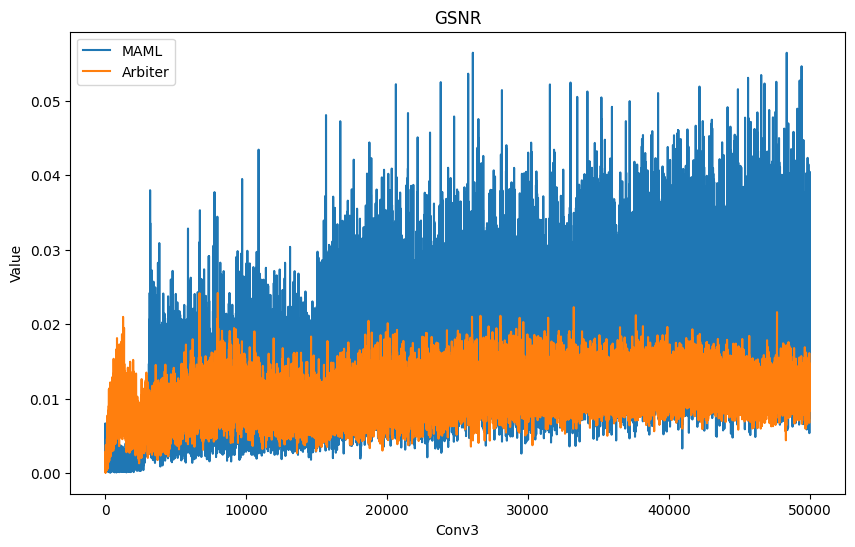

In [159]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv3.conv.weight_gsnr'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv3.conv.weight_gsnr'],label='Arbiter')

plt.xlabel('Conv3')
plt.ylabel('Value')
plt.title('GSNR')
plt.legend()

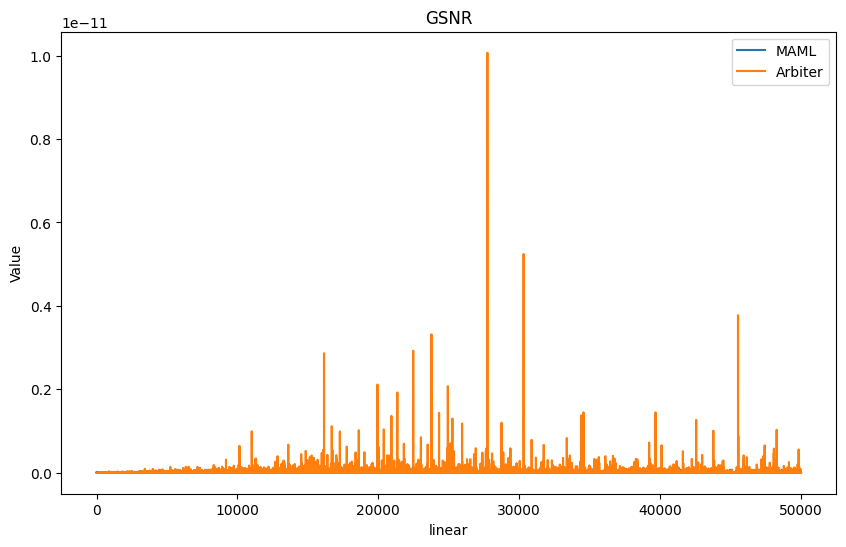

In [160]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.linear.weights_gsnr'], label='MAML')
plt.plot(arbiter_gr['layer_dict.linear.weights_gsnr'],label='Arbiter')

plt.xlabel('linear')
plt.ylabel('Value')
plt.title('GSNR')
plt.legend()